# Plotting Differential Equations

It is often desirable to plot the system of equations when solving problems about stability analysis in the 2-D plane.  
Here is a simple example of a two dimensional system from problem sheet week 8.  

$$
\begin{aligned}
\dot{x} &= -x+y-x^3 \\
\dot{y} &= -x-y-y^3
\end{aligned}
$$  

More can be done to find about equilibriums and stabilities.  

(-1.0, 1.0)

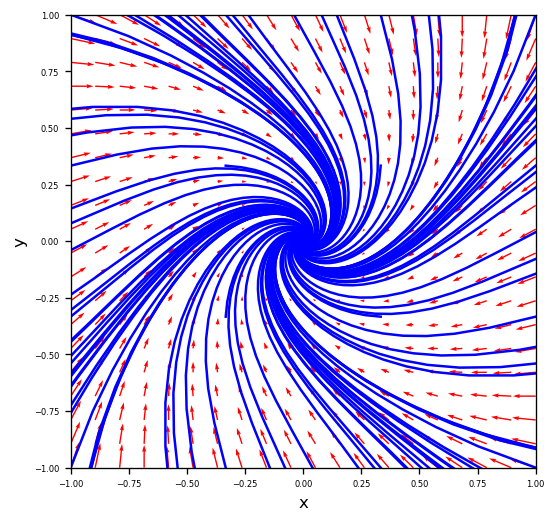

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

lim = 3 # upper and lower limits of initial values
N = 1000 # no. of time slices, higher is (ususally) more accurate and makes the plot smoother

def du_dt(u, t):
    # Defines the system of equations
    '''
    - u: 2-D vector
    - t: 1-D real
    '''
    x = u[0]
    y = u[1]
    
    # 2-dim nonlinear system  
    dxdt = -x + y - x**3
    dydt = -x - y - y**3
    
    return [dxdt, dydt]

# Trajectories in forward time.

ts = np.linspace(0, 100, N)

I = np.linspace(-lim, lim, 10) # range of initial values I*I interval in R^2

for x0 in I:
    # outer loop is the initial values of x
    for y0 in I:
        # inner loop is the initial values of y
        u0 = [x0, y0]
        xs = odeint(du_dt, u0, ts) # using built-in methods for integrating
        plt.plot(xs[:,0], xs[:,1], "b-") #  plot
        
#######################################################################################################
#######################################################################################################
# Now plot the vector field  

lim = 1 # limits of x, y values
n = 20 # no. of spacings, higher is denser
x, y = np.meshgrid(np.linspace(-lim, lim, n), np.linspace(-lim, lim, n))

dxdt = -x + y - x**3
dydt = -x - y - y**3

plt.quiver(x,y,dxdt,dydt, color = 'r')

fig = plt.gcf() # get figure
fig.set_size_inches(5,5) # set figure size
fig.set_dpi(120) # set figure resolution

# labelling
plt.xlabel("x") 
plt.ylabel("y")
plt.tick_params(labelsize=5)

# setting limits for x-y axis
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)